# Transfer learning : ResNet50 

In [5]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# transfer learning 사용하기

In [6]:
# GPU 작동확인
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15729524006965946137
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6259015680
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3295296738150342701
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [7]:
# import os
# import tensorflow as tf
# os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [8]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [9]:
# (224,224,3)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory


## steps_per_epochs, validation_steps 설정
n * e = b * s

num of sample : 전체 학습할 데이터(training examples)의 개수<br>
n = 1회 운동 당 벤치 프레스 목표 개수 (40개)

e = epochs: 몇 번 반복할 것인가? 1회<br>
<br>

b = batch size: 1세트 당 회수. 8개

s = steps: 몇 세트로 나누어 할 것인가. 5 세트

* steps_per_epoch= train_generator.samples//train_generator.batch_size

## Resnet50

In [8]:
# train 
train_datagen = ImageDataGenerator(rescale=1./255.)

In [9]:
train_generator = train_datagen.flow_from_directory('./data/smallclass/train',
                                      target_size = (224,224),
                                      batch_size=20,
                                      class_mode='categorical')

Found 18134 images belonging to 73 classes.


In [10]:
# validation
val_datagen = ImageDataGenerator(rescale=1./255.)

In [11]:
val_generator = val_datagen.flow_from_directory('./data/smallclass/val',
                                      target_size = (224,224),
                                      batch_size=20,
                                      class_mode='categorical')

Found 6870 images belonging to 73 classes.


In [12]:
# test
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
test_generator = test_datagen.flow_from_directory('./data/smallclass/test',
                                       target_size = (224,224),
                                       batch_size =20, 
                                       class_mode = 'categorical')

Found 6960 images belonging to 73 classes.


In [14]:
from tensorflow.keras.applications import ResNet50
with tf.device('/GPU:0'):
    Res_model = ResNet50(include_top=False,
                                        weights='imagenet',
                                        input_shape=(224,224,3)
                                         )

Res_model.trainable = True

In [15]:
Res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [16]:
res1_model = Sequential()
res1_model.add(Res_model)
res1_model.add(Flatten())
res1_model.add(Dense(200, activation='relu'))
res1_model.add(Dense(100, activation='relu'))
res1_model.add(Dense(73, activation='softmax'))
res1_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 200)               20070600  
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 73)                7373      
                                                                 
Total params: 43,685,785
Trainable params: 43,632,665
Non-trainable params: 53,120
_________________________________________________________________


In [17]:
res1_model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [18]:
# callback 생성하기
import os
import keras
cur_dir = os.getcwd()
ckpt_dir = 'checkpoints' # weight를 저장할 디렉토리
file_name = 'res_smallclass_weights.ckpt'

ckpt_path = os.path.join(cur_dir, 'callback_efficientnet')
os.makedirs(ckpt_path, exist_ok=True)

ckpt_filepath = os.path.join(ckpt_path, 'res1_smallclass_{epoch}' )

ckpt_callback = keras.callbacks.ModelCheckpoint(filepath = ckpt_filepath, 
                                               save_weights_only=False) # True weight만 , False 모델까지
# early stopping callback
early_stop_callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [19]:
train_generator.samples

18134

In [20]:
train_generator.batch_size

20

In [21]:
train_generator

In [22]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [23]:
res1_hist = res1_model.fit(train_generator,epochs=100,
                            steps_per_epoch=train_generator.samples//train_generator.batch_size,
                           validation_data=val_generator, validation_steps= val_generator.samples//val_generator.batch_size,
                           callbacks=[ckpt_callback,early_stop_callback])

Epoch 1/100
906/906 [==============================] - 207s 222ms/step - loss: 4.1830 - accuracy: 0.0505 - val_loss: 4.1665 - val_accuracy: 0.0547
Epoch 2/100
906/906 [==============================] - 173s 191ms/step - loss: 3.6346 - accuracy: 0.1137 - val_loss: 4.0939 - val_accuracy: 0.0727
Epoch 3/100
906/906 [==============================] - 174s 192ms/step - loss: 3.2681 - accuracy: 0.1802 - val_loss: 3.7566 - val_accuracy: 0.1448
Epoch 4/100
906/906 [==============================] - 183s 202ms/step - loss: 2.9470 - accuracy: 0.2408 - val_loss: 5.0416 - val_accuracy: 0.0389
Epoch 5/100
906/906 [==============================] - 175s 194ms/step - loss: 2.7615 - accuracy: 0.2809 - val_loss: 3.6812 - val_accuracy: 0.1423
Epoch 6/100
906/906 [==============================] - 175s 193ms/step - loss: 2.5218 - accuracy: 0.3395 - val_loss: 3.2633 - val_accuracy: 0.2450
Epoch 7/100
906/906 [==============================] - 172s 190ms/step - loss: 2.3270 - accuracy: 0.3898 - val_loss: 5

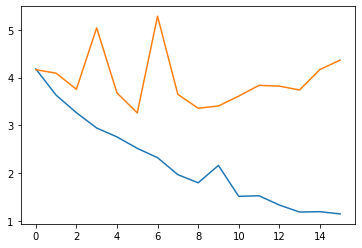

In [24]:
plt.plot(res1_hist.history['loss'])
plt.plot(res1_hist.history['val_loss'])

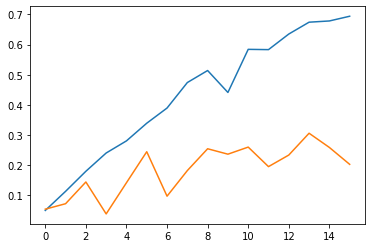

In [25]:
plt.plot(res1_hist.history['accuracy'])
plt.plot(res1_hist.history['val_accuracy'])

     --------------------------------------- 37.0/37.0 MB 10.2 MB/s eta 0:00:00


In [51]:
hist = finetune_model.fit(
    train_generator,
    epochs = 100,
    steps_per_epoch= train_generator.samples//train_generator.batch_size,
    validation_data= val_generator,
    validation_steps= val_generator.samples//test_generator.batch_size
)

Epoch 1/50
52/52 [==============================] - 9s 98ms/step - loss: 3.3597 - accuracy: 0.2432 - val_loss: 1.8116 - val_accuracy: 0.4231
Epoch 2/50
52/52 [==============================] - 4s 74ms/step - loss: 1.2538 - accuracy: 0.6381 - val_loss: 1.1507 - val_accuracy: 0.6692
Epoch 3/50
52/52 [==============================] - 4s 73ms/step - loss: 0.7973 - accuracy: 0.7665 - val_loss: 0.9626 - val_accuracy: 0.6846
Epoch 4/50
52/52 [==============================] - 4s 73ms/step - loss: 0.3787 - accuracy: 0.8911 - val_loss: 0.9766 - val_accuracy: 0.7077
Epoch 5/50
52/52 [==============================] - 4s 72ms/step - loss: 0.2036 - accuracy: 0.9494 - val_loss: 0.9112 - val_accuracy: 0.7000
Epoch 6/50
52/52 [==============================] - 4s 76ms/step - loss: 0.0975 - accuracy: 0.9728 - val_loss: 0.9650 - val_accuracy: 0.7462
Epoch 7/50
52/52 [==============================] - 4s 75ms/step - loss: 0.0564 - accuracy: 0.9922 - val_loss: 0.8285 - val_accuracy: 0.8077
Epoch 8/50
52

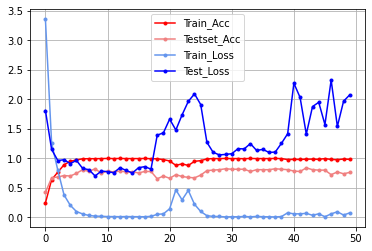

In [52]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

x_len = np.arange(len(loss))
plt.plot(x_len, acc, marker='.', c='red', label='Train_Acc')
plt.plot(x_len, val_acc, marker='.', c='lightcoral', label='Testset_Acc')
plt.plot(x_len, loss, marker='.', c='cornflowerblue', label='Train_Loss')
plt.plot(x_len, val_loss, marker='.', c='blue', label='Test_Loss')

plt.legend()
plt.grid()
plt.show()

In [ ]:
# 모델 평가
model.evaluate(test_generator)

## Mobilenet_1

In [12]:
# train 
train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory('./data/smallclass/train',
                                      target_size = (224,224),
                                      batch_size=20,
                                      class_mode='categorical')
# validation
val_datagen = ImageDataGenerator(rescale=1./255.)
val_generator = val_datagen.flow_from_directory('./data/smallclass/val',
                                      target_size = (224,224),
                                      batch_size=20,
                                      class_mode='categorical')
# test
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('./data/smallclass/test',
                                       target_size = (224,224),
                                       batch_size =20, 
                                       class_mode = 'categorical')

Found 18134 images belonging to 73 classes.
Found 6870 images belonging to 73 classes.
Found 6960 images belonging to 73 classes.


In [13]:
#nasnetmobile

from tensorflow.keras.applications import mobilenet
with tf.device('/GPU:0'):
    mob_model = tf.keras.applications.mobilenet.MobileNet(
                                                        input_shape=(224,224,3),
                                                        include_top=False,
                                                        weights='imagenet'
                                                        )
mob_model.trainable = True

In [14]:
mob_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [15]:
Mb_model1 = Sequential()
Mb_model1.add(mob_model)
Mb_model1.add(Flatten())
Mb_model1.add(Dense(200,activation='relu'))
Mb_model1.add(Dense(100,activation='relu'))
Mb_model1.add(Dense(73,activation='softmax'))

In [16]:
Mb_model1.compile(loss ='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')

In [17]:
# # callback 생성하기
# import os
# import keras
# cur_dir = os.getcwd()
# ckpt_dir = 'checkpoints' # weight를 저장할 디렉토리
# file_name = 'mob_smallclass_weights.ckpt'

# ckpt_path = os.path.join(cur_dir, 'callback_mobilenet')
# os.makedirs(ckpt_path, exist_ok=True)

# ckpt_filepath = os.path.join(ckpt_path, 'mob1_smallclass_{epoch}' )

# ckpt_callback = keras.callbacks.ModelCheckpoint(filepath = ckpt_filepath, 
#                                                save_weights_only=True) # True weight만 , False 모델까지
# # early stopping callback
# early_stop_callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [18]:
Mb_hist1 = Mb_model1.fit(train_generator,
                           epochs=100,
                           steps_per_epoch = train_generator.samples//train_generator.batch_size,
                           validation_data= val_generator,
                            validation_steps= val_generator.samples//val_generator.batch_size)

Epoch 1/100
906/906 [==============================] - 166s 161ms/step - loss: 3.4222 - accuracy: 0.1870 - val_loss: 2.9092 - val_accuracy: 0.2787
Epoch 2/100
906/906 [==============================] - 99s 109ms/step - loss: 1.6550 - accuracy: 0.5364 - val_loss: 2.1315 - val_accuracy: 0.4789
Epoch 3/100
906/906 [==============================] - 100s 110ms/step - loss: 0.9359 - accuracy: 0.7252 - val_loss: 1.6112 - val_accuracy: 0.5862
Epoch 4/100
906/906 [==============================] - 99s 109ms/step - loss: 0.6320 - accuracy: 0.8098 - val_loss: 1.4189 - val_accuracy: 0.6579
Epoch 5/100
906/906 [==============================] - 99s 109ms/step - loss: 0.4830 - accuracy: 0.8528 - val_loss: 1.5357 - val_accuracy: 0.6762
Epoch 6/100
906/906 [==============================] - 99s 109ms/step - loss: 0.3890 - accuracy: 0.8838 - val_loss: 1.1024 - val_accuracy: 0.7388
Epoch 7/100
906/906 [==============================] - 99s 110ms/step - loss: 0.3272 - accuracy: 0.8989 - val_loss: 1.5026

Epoch 57/100
906/906 [==============================] - 99s 109ms/step - loss: 0.0812 - accuracy: 0.9816 - val_loss: 1.5552 - val_accuracy: 0.7761
Epoch 58/100
906/906 [==============================] - 99s 109ms/step - loss: 0.0536 - accuracy: 0.9871 - val_loss: 1.8002 - val_accuracy: 0.7649
Epoch 59/100
906/906 [==============================] - 99s 110ms/step - loss: 0.0614 - accuracy: 0.9861 - val_loss: 1.7957 - val_accuracy: 0.7545
Epoch 60/100
906/906 [==============================] - 99s 109ms/step - loss: 0.0753 - accuracy: 0.9833 - val_loss: 1.6110 - val_accuracy: 0.7937
Epoch 61/100
906/906 [==============================] - 99s 109ms/step - loss: 0.0476 - accuracy: 0.9890 - val_loss: 1.5455 - val_accuracy: 0.7904
Epoch 62/100
906/906 [==============================] - 98s 109ms/step - loss: 0.0476 - accuracy: 0.9893 - val_loss: 1.5198 - val_accuracy: 0.7866
Epoch 63/100
906/906 [==============================] - 99s 109ms/step - loss: 0.0421 - accuracy: 0.9901 - val_loss: 1

In [43]:
Mb_model1.evaluate(test_generator)

348/348 [==============================] - 43s 124ms/step - loss: 1.5709 - accuracy: 0.7593


[1.5709151029586792, 0.7593390941619873]

In [24]:
Mb_model1.evaluate_generator(test_generator)

C:\Users\bitcamp\AppData\Local\Temp\ipykernel_3216\11328641.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  Mb_model1.evaluate_generator(test_generator)


[2.1942508220672607, 0.7727011442184448]

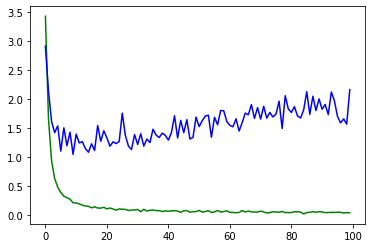

In [19]:
plt.plot(Mb_hist1.history['loss'],color='green')
plt.plot(Mb_hist1.history['val_loss'],color='blue')

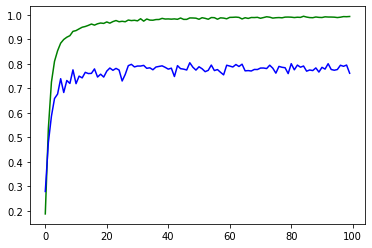

In [20]:
plt.plot(Mb_hist1.history['accuracy'],color='green')
plt.plot(Mb_hist1.history['val_accuracy'],color='blue')

INFO:tensorflow:Assets written to: ./data/model_result/mobilenet1\assets


INFO:tensorflow:Assets written to: ./data/model_result/mobilenet1\assets


In [23]:
Mb_model1.save('./data/model_result/Mb1.h5')

## MobileNet_2 :  Dense layer 추가

In [120]:
# https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/

In [25]:
# train 
train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory('./data/smallclass/train',
                                      target_size = (224,224),
                                      batch_size=20,
                                      class_mode='categorical')
# validation
val_datagen = ImageDataGenerator(rescale=1./255.)
val_generator = val_datagen.flow_from_directory('./data/smallclass/val',
                                      target_size = (224,224),
                                      batch_size=20,
                                      class_mode='categorical')
# test
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('./data/smallclass/test',
                                       target_size = (224,224),
                                       batch_size =20, 
                                       class_mode = 'categorical')

Found 18134 images belonging to 73 classes.
Found 6870 images belonging to 73 classes.
Found 6960 images belonging to 73 classes.


In [26]:
from tensorflow.keras.applications import mobilenet
with tf.device('/GPU:0'):
    mob_model2 = tf.keras.applications.mobilenet.MobileNet(weights='imagenet',
                                                             include_top= False,
                                                              input_shape=(224,224,3),
                                                              classifier_activation="softmax"
                                                                )
mob_model2.trainable = True

In [27]:
mob_model2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [28]:
Mb_model2 = Sequential()
Mb_model2.add(mob_model2)

Mb_model2.add(Flatten())

Mb_model2.add(Dense(1024,activation='relu'))
Mb_model2.add(Dense(512,activation='relu'))
Mb_model2.add(Dense(256,activation='relu'))
Mb_model2.add(Dense(128,activation='relu'))
Mb_model2.add(Dense(100,activation='relu'))

Mb_model2.add(Dense(73,activation='softmax'))

In [29]:
Mb_model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
Mb_hist2 = Mb_model2.fit(train_generator,epochs=100,
                            steps_per_epoch=train_generator.samples//train_generator.batch_size,
                           validation_data=val_generator, validation_steps= val_generator.samples//val_generator.batch_size)

Epoch 1/100
906/906 [==============================] - 106s 116ms/step - loss: 3.7354 - accuracy: 0.0938 - val_loss: 3.1879 - val_accuracy: 0.1483
Epoch 2/100
906/906 [==============================] - 105s 116ms/step - loss: 2.7337 - accuracy: 0.2395 - val_loss: 2.7355 - val_accuracy: 0.2724
Epoch 3/100
906/906 [==============================] - 105s 116ms/step - loss: 2.0263 - accuracy: 0.4108 - val_loss: 2.1319 - val_accuracy: 0.4251
Epoch 4/100
906/906 [==============================] - 105s 116ms/step - loss: 1.5084 - accuracy: 0.5529 - val_loss: 2.1099 - val_accuracy: 0.4787
Epoch 5/100
906/906 [==============================] - 105s 116ms/step - loss: 1.0834 - accuracy: 0.6774 - val_loss: 1.4809 - val_accuracy: 0.6117
Epoch 6/100
906/906 [==============================] - 105s 116ms/step - loss: 0.8348 - accuracy: 0.7551 - val_loss: 1.5637 - val_accuracy: 0.6080
Epoch 7/100
906/906 [==============================] - 105s 116ms/step - loss: 0.6706 - accuracy: 0.8057 - val_loss: 1

In [55]:
Mb_model2.evaluate_generator(test_generator)

C:\Users\bitcamp\AppData\Local\Temp\ipykernel_8960\562647914.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  Mb_model2.evaluate_generator(test_generator)


[1.3207881450653076, 0.7681034207344055]

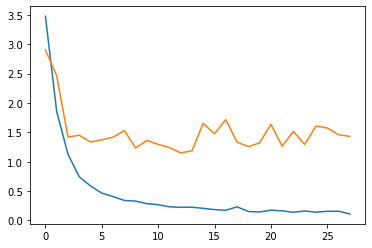

In [73]:
plt.plot(Mb_hist2.history['loss'])
plt.plot(Mb_hist2.history['val_loss'])

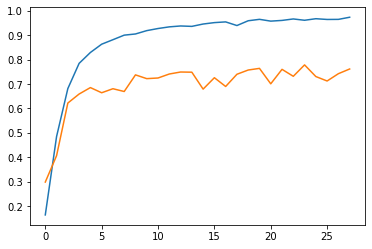

In [74]:
plt.plot(Mb_hist2.history['accuracy'])
plt.plot(Mb_hist2.history['val_accuracy'])

In [58]:
Mb_model2.save('./data/model_result/mobilenet2.h5')

INFO:tensorflow:Assets written to: ./data/model_result/mobilenet2\assets


INFO:tensorflow:Assets written to: ./data/model_result/mobilenet2\assets


## MobileNet_3 : dropout  

In [64]:
# train 
train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory('./data/smallclass/train',
                                      target_size = (224,224),
                                      batch_size=20,
                                      class_mode='categorical')
# validation
val_datagen = ImageDataGenerator(rescale=1./255.)
val_generator = val_datagen.flow_from_directory('./data/smallclass/val',
                                      target_size = (224,224),
                                      batch_size=20,
                                      class_mode='categorical')
# test
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('./data/smallclass/test',
                                       target_size = (224,224),
                                       batch_size =20, 
                                       class_mode = 'categorical')

Found 18134 images belonging to 73 classes.
Found 6870 images belonging to 73 classes.
Found 6960 images belonging to 73 classes.


In [65]:
from tensorflow.keras.applications import mobilenet
with tf.device('/GPU:0'):
    mob_model3 = tf.keras.applications.mobilenet.MobileNet(weights='imagenet',
                                                             include_top= False,
                                                              input_shape=(224,224,3),
                                                              classifier_activation="softmax"
                                                                )
mob_model3.trainable = True

In [66]:
Mb_model3 = Sequential()
Mb_model3.add(mob_model3)

Mb_model3.add(Flatten())

Mb_model3.add(Dense(1024,activation='relu'))
Mb_model3.add(Dense(512,activation='relu'))
Mb_model3.add(Dropout(0.1))
Mb_model3.add(Dense(256,activation='relu'))
Mb_model3.add(Dense(128,activation='relu'))
Mb_model3.add(Dropout(0.1))
Mb_model3.add(Dense(100,activation='relu'))

Mb_model3.add(Dense(73,activation='softmax'))

In [67]:
Mb_model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [68]:
Mb_hist3 = Mb_model3.fit(train_generator,epochs=100,
                            steps_per_epoch=train_generator.samples//train_generator.batch_size,
                           validation_data=val_generator, validation_steps= val_generator.samples//val_generator.batch_size)

Epoch 1/100
906/906 [==============================] - 106s 115ms/step - loss: 3.7940 - accuracy: 0.0954 - val_loss: 3.2383 - val_accuracy: 0.1783
Epoch 2/100
906/906 [==============================] - 104s 114ms/step - loss: 2.5108 - accuracy: 0.2991 - val_loss: 2.6759 - val_accuracy: 0.3203
Epoch 3/100
906/906 [==============================] - 104s 115ms/step - loss: 1.6645 - accuracy: 0.5088 - val_loss: 1.8832 - val_accuracy: 0.4910
Epoch 4/100
906/906 [==============================] - 104s 115ms/step - loss: 1.1317 - accuracy: 0.6626 - val_loss: 1.8961 - val_accuracy: 0.5259
Epoch 5/100
906/906 [==============================] - 107s 118ms/step - loss: 0.7980 - accuracy: 0.7606 - val_loss: 1.6895 - val_accuracy: 0.5777
Epoch 6/100
906/906 [==============================] - 106s 117ms/step - loss: 0.6178 - accuracy: 0.8138 - val_loss: 1.6465 - val_accuracy: 0.6064
Epoch 7/100
906/906 [==============================] - 105s 116ms/step - loss: 0.4923 - accuracy: 0.8528 - val_loss: 1

In [69]:
# 결과확인
Mb_model3.evaluate_generator(test_generator)

C:\Users\bitcamp\AppData\Local\Temp\ipykernel_8960\2322731749.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  Mb_model3.evaluate_generator(test_generator)


[2.9990580081939697, 0.7227011322975159]

In [ ]:
# 시각화

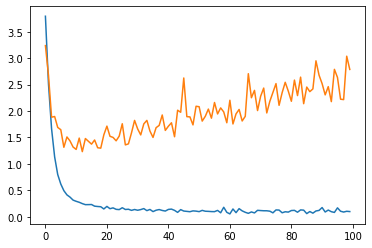

In [76]:
plt.plot(Mb_hist3.history['loss'])
plt.plot(Mb_hist3.history['val_loss'])

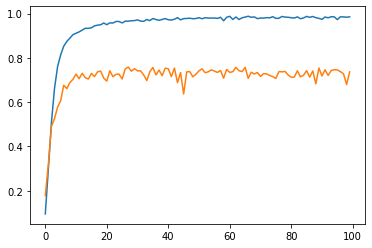

In [77]:
plt.plot(Mb_hist3.history['accuracy'])
plt.plot(Mb_hist3.history['val_accuracy'])